# Project 1 - Employee Salary Prediction

### Importing Relevent Libraries

In [1]:
import pandas as pd # for Data Frame
import numpy as np # for Mathemetical Operations
import matplotlib.pyplot as plt # for Visulization
import seaborn as sns # for Visulization
from sklearn.linear_model import LinearRegression # for Regression in Machine Learning
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error # for Accuracy
from sklearn.model_selection import train_test_split #for split data into train and test

import warnings
warnings.filterwarnings('ignore')

## Part - 1 : Data Exploration and Pre-processing

### 1)  Load the given dataset

In [2]:
df = pd.read_csv("Project_1_Employee_Salary_Prediction.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.shape

(8, 4)

In [4]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


### 2) Fill the null Value of Experience column with the value 0

In [6]:
df.experience = df.experience.fillna(0)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


### Replace alphaet number to digit

In [7]:
df.experience = df.experience.replace(['two', 'three', 'five', 'seven', 'ten', 'eleven'], [2,3,5,7,10,11])
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


### 3) Replace the Null Values of the column test score with mean value

In [8]:
mean_test_score = np.floor(df['test_score(out of 10)'].mean())

In [9]:
mean_test_score

7.0

In [10]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(mean_test_score)

In [11]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


### 4) Display a scatter plot between experience and salary

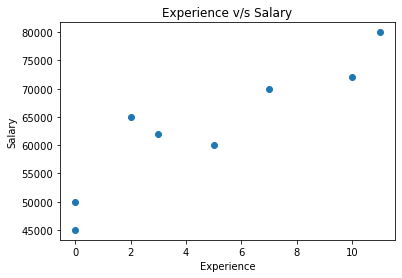

In [12]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience v/s Salary')
plt.scatter(df['experience'], df['salary($)'])
plt.show()

### 5) Display a sctter plot between test score and salary

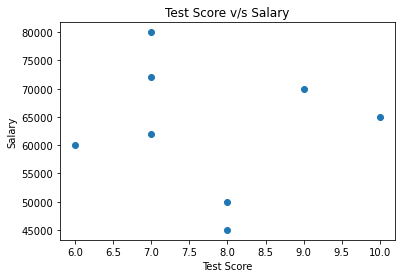

In [13]:
plt.xlabel('Test Score')
plt.ylabel('Salary')
plt.title('Test Score v/s Salary')
plt.scatter(df['test_score(out of 10)'], df['salary($)'])
plt.show()

### 6) Display a scatter plot between interview score and salary

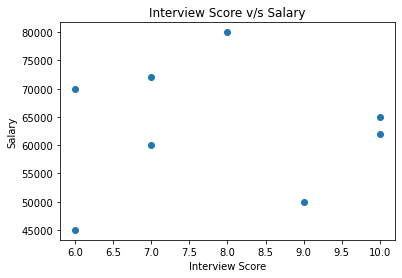

In [14]:
plt.xlabel('Interview Score')
plt.ylabel('Salary')
plt.title('Interview Score v/s Salary')
plt.scatter(df['interview_score(out of 10)'], df['salary($)'])
plt.show()

### 7) Display bar plot for experience

<AxesSubplot:xlabel='experience', ylabel='count'>

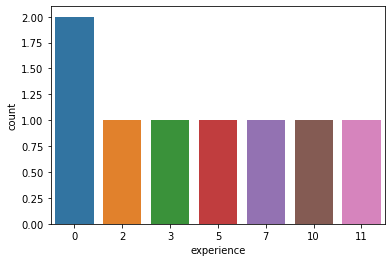

In [15]:
sns.countplot('experience', data=df)

## Part 2 - Working with Model

### 1) Separate feature data from target data

In [16]:
x = df.drop('salary($)', axis='columns')
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [17]:
y = df[['salary($)']]
y

,salary($)
0,50000
1,45000
2,60000
3,65000
4,70000
5,62000
6,72000
7,80000


### 2) Create a Linear Regression model between Feature data and target data

In [18]:
regression_model = LinearRegression()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [29]:
x_train

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
6,10,7.0,7
4,7,9.0,6
2,5,6.0,7
3,2,10.0,10


In [30]:
y_train

,salary($)
0,50000
1,45000
6,72000
4,70000
2,60000
3,65000


In [31]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [32]:
price_predicted_train = regression_model.predict(x_train)
price_predicted_train

array([[51409.75269471],
       [46048.11089358],
       [74328.9452958 ],
       [68873.19696663],
       [57306.05999235],
       [64033.93415693]])

In [33]:
price_predicted_test = regression_model.predict(x_test)
price_predicted_test

array([[59382.88440334],
       [79017.2596143 ]])

In [34]:
salary_predicted = regression_model.predict(x)
salary_predicted

array([[51409.75269471],
       [46048.11089358],
       [57306.05999235],
       [64033.93415693],
       [68873.19696663],
       [59382.88440334],
       [74328.9452958 ],
       [79017.2596143 ]])

### 3) Display the test score and training score

In [35]:
regression_model.score(x_train, y_train)*100

96.97131353647

In [36]:
regression_model.score(x_test, y_test)*100

95.17588104199723

### 4) Extract slope and intercept value from the model

In [28]:
print('Slop: ', regression_model.coef_)
print('Intercept: ', regression_model.intercept_)

Slop:  [[3107.68383365 2575.59900854 2184.5221702 ]]
Intercept:  [11212.88901129]


### 5) Display Mean Squared Error

In [29]:
mse = mean_squared_error(y, salary_predicted)
mse

3174226.7672550464

In [30]:
print('Mean Squared Error: ', mse)

Mean Squared Error:  3174226.7672550464


### 6) Display Mean Absolute Error

In [31]:
mae = mean_absolute_error(y, salary_predicted)
mae

1366.9099421646952

In [32]:
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  1366.9099421646952


### 7) Display Root Mean Squared Error

In [33]:
rmse = np.sqrt(mse)
rmse

1781.6359805681536

In [34]:
print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  1781.6359805681536


### 8) Display R2 Score

In [35]:
r2 = round(r2_score(y, salary_predicted)*100, 2)

In [36]:
print('R2 Score: ', r2)

R2 Score:  97.26
